In [2]:
import pandas as pd
from sklearn import preprocessing

### Import CSV. The original data file lacked column names so we used Excel to insert them. 
### This will make our lives easier. Also print for a brief sanity check.
### NOTE: make sure to change your this inpath and the outpath at the end.
inpath = "C:/Users/Davis/Downloads/magic04data.csv" 
data = pd.read_csv(inpath, header=0)
print(data)

### Now we preprocess the data. Since this dataset was created via simulation, we don't have much to do here as there
### are no missing values or NaNs or other issues to clean up. All we need to do is scale the data so it plays nicely 
### with the machine learning tools we'll use later. We will use sklearn's standard scaler. It's a good tool.

### First pop the target column, these are not numbers and sklearn's scaler will get confused
target = data.pop("Class")

### Retain column names and indexing for later (standard scaler outputs a numpy array which we will transform back to a 
### pandas dataframe. Having this information will ensure that process performs as expected)
column_names = data.columns
index = data.index

### Scale that data my friends.
scaler = preprocessing.MinMaxScaler(feature_range = (-1, 1))
data = scaler.fit_transform(data)

### It's that easy. Now put it all back together and do another print sanity check.
data = pd.DataFrame(data, index, column_names)
data = data.join(target)

### Replace classes (g for gamma ray, h for hadrons (noise to us)) with 1 and 0, respectively
data.Class.replace(to_replace=dict(g=1, h=0), inplace=True)

print(data)

### Now I save this to another CSV for easy usage when we build our models. 
outpath = "C:/Users/Davis/Downloads/scaledmagicdata2.csv"
data.to_csv(outpath, index = False)

        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  Class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610 

In [1]:
import pandas as pd
from sklearn import preprocessing

### Import CSV. The original data file lacked column names so we used Excel to insert them. 
### This will make our lives easier. Also print for a brief sanity check.
### NOTE: make sure to change your this inpath and the outpath at the end.
inpath = "C:/Users/Davis/Downloads/magic04data.csv" 
data = pd.read_csv(inpath, header=0)
print(data)



        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  Class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610 

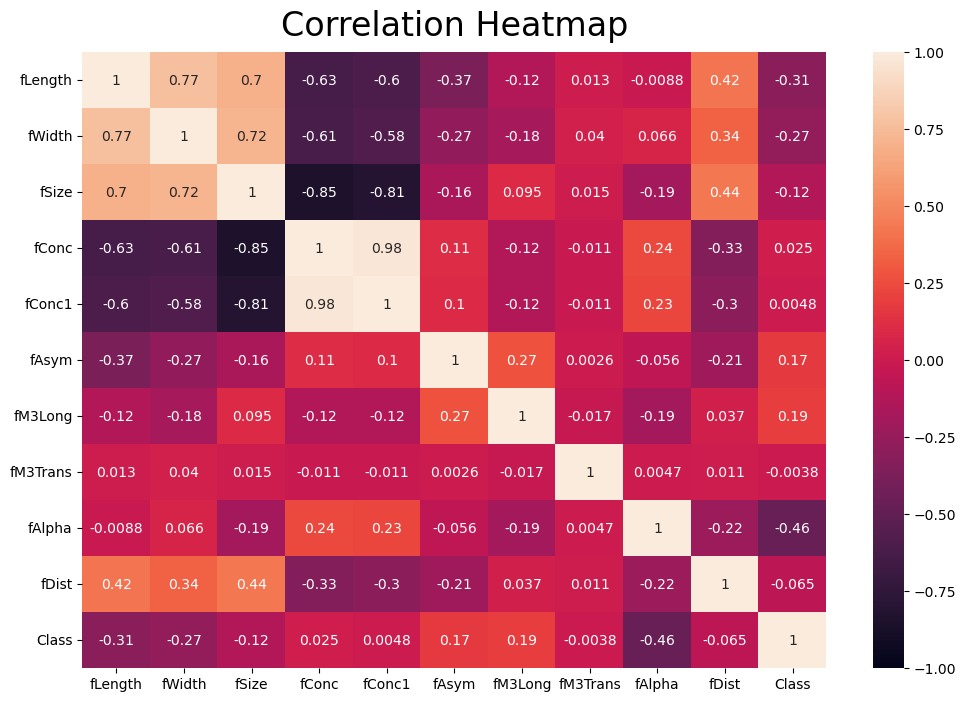

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12)
plt.savefig('C:/Users/Davis/Desktop/CorrelationHeatmap.png')